* Findings:
* Despite making up on 2.6% of total drivers, rural fares make up 6.8% of total fares. Clearly, recruiting such drivers is a good investment.
* Average fare & total rides appear to have a negative relationship on aggregate. When we split by city type, however, no such relationship exists.
* Urban drivers are the lion's share of Pybers drivers.

In [229]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data=pd.read_csv(city_data_to_load)
ride_data=pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_data=pd.merge(ride_data,city_data,on="city",how="left")

# Display the data table for preview
pyber_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


# Calculating Ride Sharing Statistics

In [232]:
# Group by 
pyber_group=pyber_data.groupby('city')

# Bubble plot data

# Average Fare ($) Per City
avg_fare=pd.DataFrame(pyber_group['fare'].mean())

# Total Number of Rides Per City
total_rides=pd.DataFrame(pyber_group['ride_id'].count())

# Total Number of Drivers Per City
num_drivers=pd.DataFrame(pyber_group['driver_count'].mean())

# City Type (Urban, Suburban, Rural)
city_type=city_data[['city','type']]
# sort data to match other dataframes' order
city_type=city_type.sort_values('city')

# Bubble Plot of Ride Sharing Data

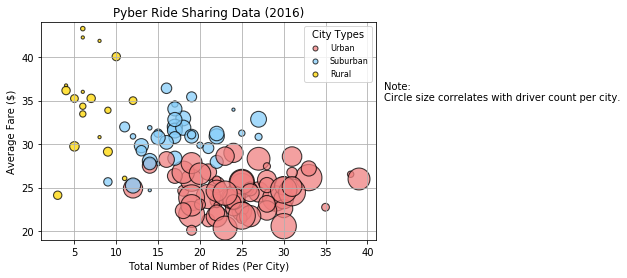

In [233]:
# Obtain the x and y coordinates for each of the three city types
# why would I want to do this?

# Create list for colors
colors=['gold' if city == 'Rural' else 'lightskyblue' if city=='Suburban' else 'lightcoral' for city in city_type['type']]

# List for labels
labels=[type for type in city_type['type']]

# Build the scatter plots for each city types
myplot = plt.scatter(x=total_rides,y=avg_fare, s=num_drivers*10,c=colors,alpha=.75,edgecolor='black',linewidths=1.1)

# Labels & titles
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title('Pyber Ride Sharing Data (2016)')

# Add grid
plt.grid()


# Create a legend
# Using work-around - pass dummy plotted point as artist object 
plt.legend( [
            plt.scatter(x=-100,y=-100,s=25,c="lightcoral",edgecolor='black',alpha=0.75),
            plt.scatter(x=-100,y=-100,s=25,c="lightskyblue",edgecolor='black',alpha=0.75),
            plt.scatter(x=-100,y=-100,s=25,c="gold",edgecolor='black',alpha=0.75)
            ],
            ["Urban",
             "Suburban",
             "Rural"
            ],
            title="City Types",
            prop={'size':8}
            )

# Re-size plot area to make dummy points out of sight
plt.xlim(1,41)
plt.ylim(19,44)


# Incorporate a text label regarding circle size
plt.text(s='Note:\nCircle size correlates with driver count per city.',y=35,x=42)

# Save Figure
plt.savefig('Pyber Ride Sharing Data (2016).png')

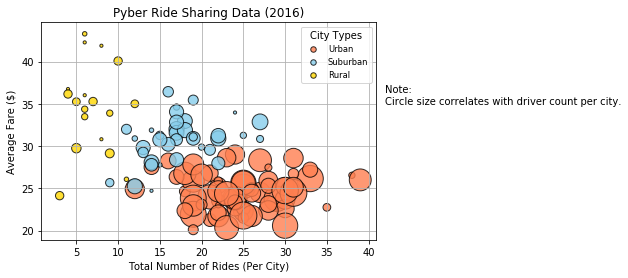

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

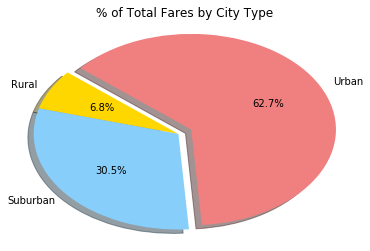

In [234]:
# Calculate Type Percents

# Group by city type
type_group=pyber_data.groupby('type')

# % of Total Fares by City Type
total_fares=pyber_data['fare'].sum()
pct_fares=pd.DataFrame(type_group['fare'].sum())/total_fares

# Build Pie Chart
plt.pie(pct_fares['fare'],explode=(0,0,0.05),labels=list(pct_fares.index), 
        autopct="%1.1f%%",startangle=140,colors=['gold','lightskyblue','lightcoral'],shadow=True,radius=.5)

plt.title('% of Total Fares by City Type')

# Change rotation
plt.axis('auto')

# Save Figure
plt.savefig('% of Total Fares by City Type')


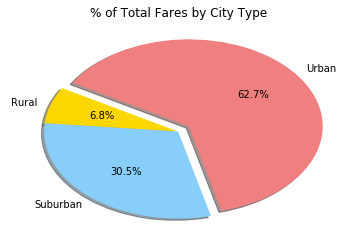

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

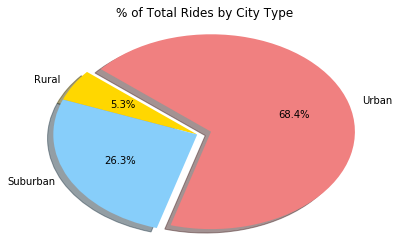

In [235]:
# Calculate Ride Percents

# % of Total Rides by City Type
all_fares=pyber_data['ride_id'].count()
pct_rides=pd.DataFrame(type_group['ride_id'].count())/all_fares

# Build Pie Chart
plt.pie(pct_rides['ride_id'],explode=(0,0,0.05),labels=list(pct_fares.index), 
        autopct="%1.1f%%",startangle=140,colors=['gold','lightskyblue','lightcoral'],shadow=True,radius=.5)

plt.title('% of Total Rides by City Type')

# Change rotation
plt.axis('auto')

# Save Figure
plt.savefig('% of Total Rides by City Type')

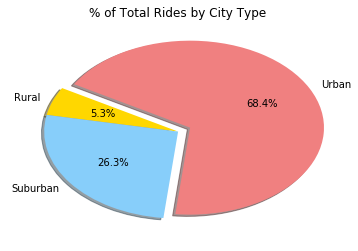

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

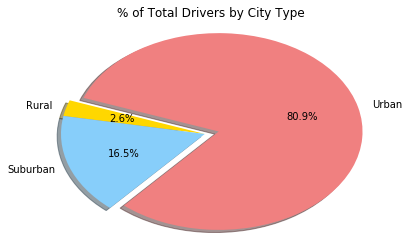

In [236]:
# Calculate Driver Percents

# Group city data by city type
city_type_group=city_data.groupby('type')

# % of Total Drivers by City Type
total_drivers=city_data['driver_count'].sum()
pct_drivers=pd.DataFrame(city_type_group['driver_count'].sum())/total_drivers

# Build Pie Chart
plt.pie(pct_drivers['driver_count'],explode=(0,0,0.075),labels=list(pct_fares.index), 
        autopct="%1.1f%%",startangle=160,colors=['gold','lightskyblue','lightcoral'],shadow=True,radius=.75)

plt.title('% of Total Drivers by City Type')

# Change rotation
plt.axis('auto')

# Save Figure
plt.savefig('% of Total Drivers by City Type')

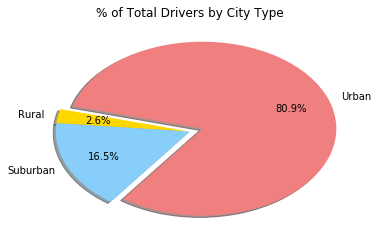

In [6]:
# Show Figure
plt.show()